In [1]:
import sys
# print(sys.path)
sys.path.insert(0,'..')
# print(sys.path)

In [2]:
from Prob_torch_HJB_Raissi import HJB_Raissi
print( HJB_Raissi.__doc__ )
print( HJB_Raissi.__init__.__doc__ )


    class HJB_Raissi(FBSNN_torch)
    
None


In [3]:
import torch # for: torch.sin,
import numpy as np # for: np.exp, np.sum

In [4]:
### Problem

In [18]:
## model
M = 100 # number of trajectories (batch size)
N = 10 # 20 # 50 # number of time snapshots
D = 4 # 2 # 100 # number (even) of dimensions

layer_size = 32 # 256 # 256
    
layers = [D+1] + 4*[layer_size] + [1]
# print( layers )
    
# Xi = torch.from_numpy(np.array([1.0,0.5]*int(D/2))[None,:]).float()
# Xi = np.zeros([1,D])
Xi = torch.from_numpy(np.array([0.0]*D)[None,:]).float()
# print(Xi.shape, Xi)
T = 1.0
s = 0.5
act_func = torch.tanh # torch.nn.functional.relu # torch.sin # 
    
model = HJB_Raissi(Xi, T,   M, N, D,   layers, act_func = act_func, s=s)
print( f'model = {model}' )
print( f'model.loss_n = {model.loss_n}' )
print( f'model.tool = {model.tool}' )
print( f"hasattr(self, 'act_func')={hasattr(model, 'act_func')}" )
print(model.loss_history, model.it_loss_history)

print( f'model.fn_u={model.fn_u}, model.fn_u.fc={model.fn_u.fc}' )

model = model_HJB_Raissi: s=0.5, T=1.0, D=4, Xi[0:4]=tensor([[0., 0., 0., 0.]]); 	 N=10; 
	 NNparams: M=100, layers=[5, 32, 32, 32, 32, 1], act_func=<built-in method tanh of type object at 0x00007FFFC63F55E0>, optimizer=<class 'torch.optim.adam.Adam'>; 
	 Learning: it=0; ; sigma=1.4142135623730951
model.loss_n = 1
model.tool = pyTorch
hasattr(self, 'act_func')=True
[] 10
model.fn_u=neural_net(
  (out): Linear(in_features=32, out_features=1, bias=True)
), model.fn_u.fc=[Linear(in_features=5, out_features=32, bias=True), Linear(in_features=32, out_features=32, bias=True), Linear(in_features=32, out_features=32, bias=True), Linear(in_features=32, out_features=32, bias=True)]


In [19]:
model.train(N_Iter = 5*10**2, learning_rate=1e-3) #, it_print=50) # 20000)

It: 100, Loss: 1.399e-01, Y0: -0.612, Time: 2.03, Learning Rate: 1.000e-03
It: 200, Loss: 9.531e-02, Y0: -0.691, Time: 1.87, Learning Rate: 1.000e-03
It: 300, Loss: 8.681e-02, Y0: -0.708, Time: 1.99, Learning Rate: 1.000e-03
It: 400, Loss: 8.635e-02, Y0: -0.714, Time: 2.01, Learning Rate: 1.000e-03
It: 500, Loss: 8.636e-02, Y0: -0.718, Time: 2.05, Learning Rate: 1.000e-03


In [22]:
model.train(N_Iter = 15*10**2, learning_rate=1e-2, it_print=50) # 20000)

It: 1550, Loss: 3.093e+00, Y0: 2.682, Time: 1.45, Learning Rate: 1.000e-02
It: 1600, Loss: 3.608e+00, Y0: 2.697, Time: 1.27, Learning Rate: 1.000e-02
It: 1650, Loss: 3.011e+00, Y0: 2.660, Time: 1.14, Learning Rate: 1.000e-02
It: 1700, Loss: 4.182e+00, Y0: 2.738, Time: 1.21, Learning Rate: 1.000e-02
It: 1750, Loss: 3.688e+00, Y0: 2.706, Time: 1.22, Learning Rate: 1.000e-02
It: 1800, Loss: 2.555e+00, Y0: 2.657, Time: 1.12, Learning Rate: 1.000e-02
It: 1850, Loss: 3.624e+00, Y0: 2.706, Time: 1.07, Learning Rate: 1.000e-02
It: 1900, Loss: 3.480e+00, Y0: 2.693, Time: 1.13, Learning Rate: 1.000e-02
It: 1950, Loss: 3.233e+00, Y0: 2.667, Time: 1.04, Learning Rate: 1.000e-02
It: 2000, Loss: 3.716e+00, Y0: 2.651, Time: 1.13, Learning Rate: 1.000e-02
It: 2050, Loss: 2.937e+00, Y0: 2.658, Time: 1.01, Learning Rate: 1.000e-02
It: 2100, Loss: 3.716e+00, Y0: 2.705, Time: 1.14, Learning Rate: 1.000e-02
It: 2150, Loss: 3.256e+00, Y0: 2.706, Time: 1.22, Learning Rate: 1.000e-02
It: 2200, Loss: 3.535e+00

In [20]:
import matplotlib.pyplot as plt

In [21]:
# print(model.loss_history)
lh_arr = np.array(model.loss_history).T
print( lh_arr.shape )
# print( lh_arr )

(2, 50)


<ipython-input-21-81102754d8db>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lh_arr = np.array(model.loss_history).T


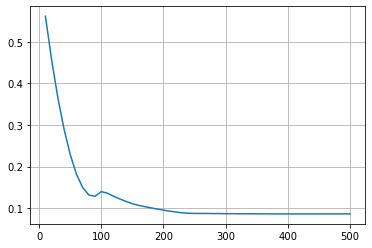

In [22]:
plt.plot( lh_arr[0], lh_arr[1] )
plt.grid()

In [23]:
t_test_, W_test_ = model.fetch_minibatch()
X_pred_, Y_pred_ = model.predict(Xi, t_test_, W_test_)
t_test = t_test_.detach().numpy()
X_pred = X_pred_.detach().numpy()
Y_pred = Y_pred_.detach().numpy()
# print(X_pred_, Y_pred_, sep='\n')

In [24]:
M_ = 5 # M
Y_test = np.reshape(model.u_exact(np.reshape(t_test[0:M_,:,:],[-1,1]), np.reshape(X_pred[0:M_,:,:],[-1,D])),[M_,-1,1])
print(Y_test[0,0,0])

0.6136437532448492


In [25]:
res = (t_test, X_pred, Y_pred, Y_test)

In [26]:
from FBSNNs_plots import plot_results # *

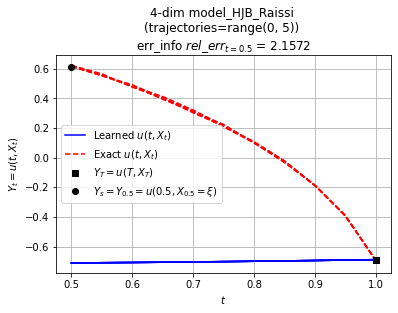

In [27]:
fig = plot_results(model, res, flag_err_info=1)

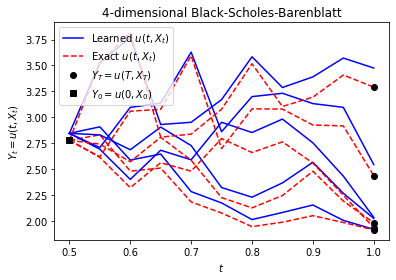

In [160]:
    samples = 5
    
    plt.figure()
    plt.plot(t_test[0:1,:,0].T,Y_pred[0:1,:,0].T,'b',label='Learned $u(t,X_t)$')
    plt.plot(t_test[0:1,:,0].T,Y_test[0:1,:,0].T,'r--',label='Exact $u(t,X_t)$')
    plt.plot(t_test[0:1,-1,0],Y_test[0:1,-1,0],'ko',label='$Y_T = u(T,X_T)$')
    
    plt.plot(t_test[1:samples,:,0].T,Y_pred[1:samples,:,0].T,'b')
    plt.plot(t_test[1:samples,:,0].T,Y_test[1:samples,:,0].T,'r--')
    plt.plot(t_test[1:samples,-1,0],Y_test[1:samples,-1,0],'ko')

    plt.plot([model.s],Y_test[0,0,0],'ks',label='$Y_0 = u(0,X_0)$')
    
    plt.xlabel('$t$')
    plt.ylabel('$Y_t = u(t,X_t)$')
    plt.title(f'{model.D}-dimensional Black-Scholes-Barenblatt')
    plt.legend()